In [55]:
import os
import pandas as pd
import numpy as np
import cv2

import gradio as gr
from PIL import Image, ImageDraw, ImageFont
import glob
import json

In [56]:
os.chdir("..")

In [65]:
IN_PATH = r"Z:\Coding\gallery_view\OUTPUT\2_23_OUTPAINT"
OUT_PATH = r"Z:\Coding\gallery_view\OUTPUT\2_23_TEXT"
INPUT_CSV = f"data/2_21_without_image.csv"

prov = "PG SOFT"

In [66]:
def split_text(text):
    text = text.replace("-", "").upper()
    text = text.split()
    
    THRESH = 9
    THRESH_2 = 7    
    
    new_text = []
    
    if text[0] == "THE":
        del text[0]
        text[0] = "THE " + text[0]
    
    
    if "VS" in text:
        text = " ".join(text)
        text = text.split(" VS ")
        return [[text[0]], ["VS"], [text[1]]]
    
    if len(text) <= 3:
        if len(" ".join(text)) < THRESH_2:
            new_text = [[" ".join(text)]]
        else:
            new_text = [text[:1], text[1:]]
    else:
        a = ""
        for i in text:
            if i == "THE":
                new_text.append([a.strip()])
                new_text.append([i.strip()])
                a = ""
                continue
            if len(a) < THRESH:
                a += " " + i
            else:
                new_text.append([a.strip()])
                a = i
        new_text.append([a.strip()])
    return new_text

In [67]:
splits = {
    1: [[340, 78]],
    2: [[355, 56], [400, 68]],
    3: [[310, 68], [370, 44], [420, 68]],
    4: [[300, 68], [350, 58], [390, 68], [420, 68]]
}

UP_FONT_PATH = "fonts/RubikWetPaint-Regular.ttf"

FONT_PATH = "fonts/RedHatText-VariableFont_wght.ttf"

TOP = 490


In [68]:
tops = [310, 350, 350, 340, 340]

In [69]:
HASH2PROVIDER = {}
HASH2NAME = {}

xl = pd.read_csv(INPUT_CSV)

for i in range(len(xl)):
    i = xl.iloc[i]

    if not isinstance(i['Name'], str):
        continue

    name = i['Hash']
    HASH2PROVIDER[name] = i['Provider']
    HASH2NAME[name] = i["Name"]

In [74]:
input_hash = r"33a19c46fddd4c81852d1c0dfa837950"
input_name = "pornmaster_Euler_38_4_0.5_0cb.png"

In [75]:
text = HASH2NAME[input_hash]
text = split_text(text)
img = Image.open(os.path.join(IN_PATH, input_hash, input_name))
img = img.convert("RGB")

s = splits[len(text)]
top = tops[len(text)]
s, top

([[355, 56], [400, 68]], 350)

In [76]:
for t in text:
    t = " ".join(t)
    image = Image.new('RGB', img.size, "white")
    draw = ImageDraw.Draw(image)
    
    w = 1000
    print(t)
    for f_size in [38, 42, 46, 48, 52, 56, 64, 72, 80, 98, 106, 112]:
        
        font = ImageFont.truetype(UP_FONT_PATH, f_size)
        
        _, _, w, h = draw.textbbox(
            (0, 0), t, font=font
        )
        print(w, h)
        if w > 360 or h > (150 / len(text)):
            draw = ImageDraw.Draw(img)
            draw.text(((img.size[0] - w) / 2, top), t, font=font, fill="white")
            top += h - 10
            break


BURNING
182 45
201 50
221 55
232 57
249 62
268 67
307 76
PEARL MOBILE
291 46
321 51
353 56
368 57


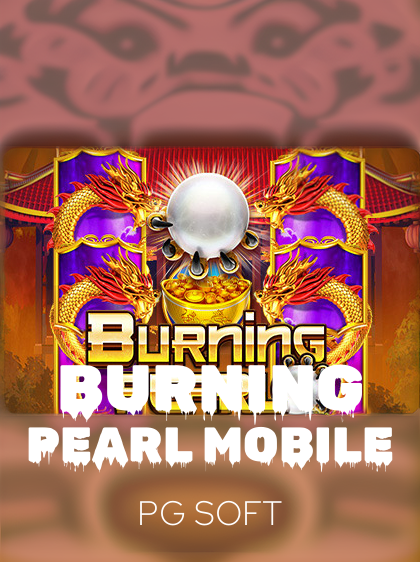

In [77]:
image = Image.new('RGB', img.size, "white")
draw = ImageDraw.Draw(image)
font = ImageFont.truetype(FONT_PATH, 34)

_, _, w, h = draw.textbbox(
    (0, 0), prov, font=font
)

draw = ImageDraw.Draw(img)
draw.text(((img.size[0] - w) / 2, TOP), prov, font=font, fill="white")

img

In [50]:
img = img.resize((544, 544))
img = np.array(img)
img = img[:, 68:-68]
img = Image.fromarray(img)

s = splits[len(text)]

top = tops[len(text)]

for t in text:
    t = " ".join(t)
    image = Image.new('RGB', img.size, "white")
    draw = ImageDraw.Draw(image)
    
    w = 1000
    print(t)
    for f_size in [38, 42, 46, 48, 52, 56, 64, 72, 80, 98, 106, 112]:
        
        font = ImageFont.truetype(UP_FONT_PATH, f_size)
        
        _, _, w, h = draw.textbbox(
            (0, 0), t, font=font
        )
        print(w, h)
        if w > 360 or h > (150 / len(text)):
            draw = ImageDraw.Draw(img)
            draw.text(((img.size[0] - w) / 2, top), t, font=font, fill="white")
            top += h - 10
            break


image = Image.new('RGB', img.size, "white")
draw = ImageDraw.Draw(image)
font = ImageFont.truetype(FONT_PATH, 34)

_, _, w, h = draw.textbbox(
    (0, 0), prov, font=font
)

draw = ImageDraw.Draw(img)
draw.text(((img.size[0] - w) / 2, TOP), prov, font=font, fill="white")

img.save(os.path.join(OUT_PATH, img_path))


BOOK OF


OSError: cannot open resource

In [7]:
for img_path in os.listdir(IN_PATH):
    if img_path.endswith(".json"):
        continue
    # img_path = "WIN WIN FISH PRAWN CRAB PG SOFT.png"
    
    text = ".".join(img_path.split(".")[:-1]).replace(prov, "").strip()

    text = split_text(text.split(" "))
    
    img = Image.open(os.path.join(IN_PATH, img_path))
    img = img.convert("RGB")
    
    img = img.resize((544, 544))
    img = np.array(img)
    img = img[:, 68:-68]
    img = Image.fromarray(img)
    
    s = splits[len(text)]
    
    top = tops[len(text)]
    
    for t in text:
        t = " ".join(t)
        image = Image.new('RGB', img.size, "white")
        draw = ImageDraw.Draw(image)
        
        w = 1000
        print(t)
        for f_size in [38, 42, 46, 48, 52, 56, 64, 72, 80, 98, 106, 112]:
            
            font = ImageFont.truetype(UP_FONT_PATH, f_size)
            
            _, _, w, h = draw.textbbox(
                (0, 0), t, font=font
            )
            print(w, h)
            if w > 360 or h > (150 / len(text)):
                draw = ImageDraw.Draw(img)
                draw.text(((img.size[0] - w) / 2, top), t, font=font, fill="white")
                top += h - 10
                break

    
    image = Image.new('RGB', img.size, "white")
    draw = ImageDraw.Draw(image)
    font = ImageFont.truetype(FONT_PATH, 34)

    _, _, w, h = draw.textbbox(
        (0, 0), prov, font=font
    )

    draw = ImageDraw.Draw(img)
    draw.text(((img.size[0] - w) / 2, TOP), prov, font=font, fill="white")

    img.save(os.path.join(OUT_PATH, img_path))


PermissionError: [Errno 13] Permission denied: 'Z:\\Coding\\gallery_view\\OUTPUT\\2_23_OUTPAINT\\001c9c9e36874c3a8f1a99a8631af3d4'

In [107]:
130 / len(text)

43.333333333333336

In [84]:
text

[['EMOJI'], ['RICHES']]

In [73]:
for img_path in os.listdir(IN_PATH):
    if img_path.endswith(".json"):
        continue
    
    text = ".".join(img_path.split(".")[:-1]).replace(prov, "").strip()

    text = split_text(text.split(" "))
    
    img = Image.open(os.path.join(IN_PATH, img_path))
    img = img.convert("RGB")
    
    img = img.resize((544, 544))
    img = np.array(img)
    img = img[:, 68:-68]
    img = Image.fromarray(img)
    
    s = splits[len(text)]
    
    for t, (top, f_size) in zip(text, s):
        t = " ".join(t)
        image = Image.new('RGB', img.size, "white")
        draw = ImageDraw.Draw(image)
        
        font = ImageFont.truetype(UP_FONT_PATH, f_size)
        
        _, _, w, h = draw.textbbox(
            (0, 0), t, font=font
        )
    
        draw = ImageDraw.Draw(img)
        draw.text(((img.size[0] - w) / 2, top), t, font=font, fill="white")
    
    image = Image.new('RGB', img.size, "white")
    draw = ImageDraw.Draw(image)
    font = ImageFont.truetype(FONT_PATH, 34)

    _, _, w, h = draw.textbbox(
        (0, 0), prov, font=font
    )

    draw = ImageDraw.Draw(img)
    draw.text(((img.size[0] - w) / 2, TOP), prov, font=font, fill="white")

        
    img.save(os.path.join(OUT_PATH, img_path))


In [53]:
img = img.resize((544, 544))

In [ ]:
408

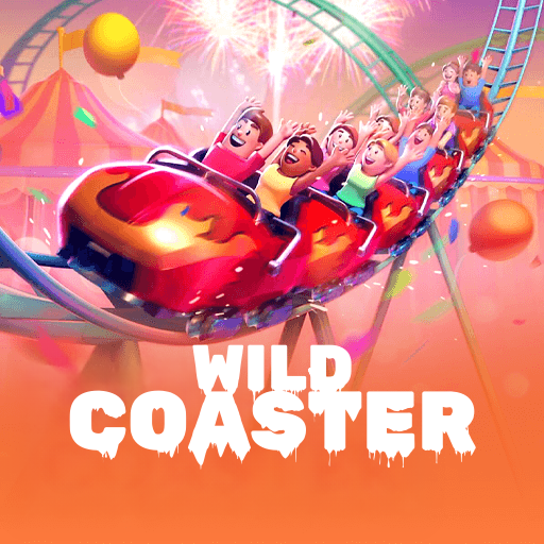

In [54]:
img

In [55]:
img = np.array(img)
img.shape

(544, 544, 3)

In [59]:
img[68:-68].shape

(408, 544, 3)

In [57]:
(544 - 408) / 2

68.0

In [39]:
len("FORTUNE OX")

10

In [10]:
text.split()

['EMOJI', 'RICHES']

In [13]:
text = "DESTINY OF SUN AND MOON"
text = text.split(" ")
text

['DESTINY', 'OF', 'SUN', 'AND', 'MOON']

SyntaxError: invalid syntax (3841739196.py, line 16)

In [14]:
len(text)

5